In [29]:
import numpy

def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

In [30]:
plane1=[
      [0, 0],
      [0, 256],
      [256, 0],
      [256, 256]
]

plane2=[
      [0, 0],
      [0, 256],
      [256, 100],
      [256, 230]
]

In [59]:
x=find_coeffs(plane1,plane2)

In [60]:
x=numpy.append(x,1)
x=x.reshape((3,3))

In [61]:
x

array([[ 1.96923077e+00,  1.20313915e-15, -8.47322212e-13],
       [ 7.69230769e-01,  1.00000000e+00, -7.60346060e-13],
       [ 3.78605769e-03, -3.27568817e-18,  1.00000000e+00]])

In [40]:
import numpy as np

In [46]:
def perspectiveTransform(perspectiveMatrix, sourcePoints):
    '''
    perspectiveMatrix as above
    sourcePoints has shape (n,2)
    '''

    # first we extend source points by a column of 1
    # augment has shape (n,1)
    augment = np.ones((sourcePoints.shape[0],1))
    
    print('aug',augment)
    # projective_corners is a 3xn matrix with last row all 1
    # note that we transpose the concatenation
    projective_corners = np.concatenate( (sourceCorners, augment), axis=1).T
    
    print(projective_corners)

    # projective_points has shape 3xn
    projective_points = perspectiveMatrix.dot(projective_corners)

    # obtain the target_points by dividing the projective_points 
    # by its last row (where it is non-zero)
    # target_points has shape (3,n).
    target_points = np.true_divide(projective_points, projective_points[-1])

    # so we want return points in row form
    return target_points[:2].T

In [42]:
x

array([[ 1.96923077e+00,  1.20313915e-15, -8.47322212e-13],
       [ 7.69230769e-01,  1.00000000e+00, -7.60346060e-13],
       [ 3.78605769e-03, -3.27568817e-18,  1.00000000e+00]])

In [49]:
perspectiveTransform(x,np.array(plane2))

aug [[1.]
 [1.]
 [1.]
 [1.]]
[[  0.   0. 256. 256.]
 [  0. 256.   0. 256.]
 [  1.   1.   1.   1.]]


array([[-8.47322212e-13, -7.60346060e-13],
       [-5.39318590e-13,  2.56000000e+02],
       [ 2.56000000e+02,  1.00000000e+02],
       [ 2.56000000e+02,  2.30000000e+02]])

In [48]:
sourceCorners = np.array(plane1,dtype=np.float32)
destinationCorners = np.array(plane2,dtype=np.float32)

In [52]:
# Imports PIL module 
from PIL import ImageFont, ImageDraw, Image
import PIL 
  
# creating a image object (new image object) with 
# RGB mode and size 200x200 

width = 256
im = PIL.Image.new(mode = "L", size = (width, width),color='white')

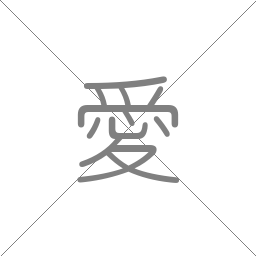

In [53]:
draw = ImageDraw.Draw(im)

fontsize = 120
font = ImageFont.truetype("/home/data/japanese/Fonts/epmarugo.ttf", fontsize)
char ="愛"

x = (width - fontsize)/2
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)
draw.text((x, x), char, font=font, fill=128)


im

In [54]:
from numpy import array
arr = array(im)

In [57]:
arr

array([[128, 255, 255, ..., 255, 255, 255],
       [255, 128, 255, ..., 255, 255, 128],
       [255, 255, 128, ..., 255, 128, 255],
       ...,
       [255, 255, 255, ..., 128, 255, 255],
       [255, 255, 128, ..., 255, 128, 255],
       [255, 128, 255, ..., 255, 255, 128]], dtype=uint8)

In [58]:
x

68.0